In [1]:
%pip install mne 

  Using cached mne-1.4.0-py3-none-any.whl (7.7 MB)
  Using cached pooch-1.7.0-py3-none-any.whl (60 kB)
  Attempting uninstall: pooch
    Found existing installation: pooch 1.4.0
    Uninstalling pooch-1.4.0:
      Successfully uninstalled pooch-1.4.0
Note: you may need to restart the kernel to use updated packages.


In [10]:
%pip show mne

Name: mne
Version: 1.4.0
Summary: MNE-Python project for MEG and EEG data analysis.
Home-page: https://mne.tools/dev/
Author: 
Author-email: 
License: BSD-3-Clause
Location: /home/arjuna/miniconda3/lib/python3.10/site-packages
Requires: decorator, jinja2, matplotlib, numpy, packaging, pooch, scipy, tqdm
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import mne
import matplotlib.pyplot as plt
import glob

In [3]:
# Specify the path to your .txt file
file_path = "../data/eeg/OpenBCI-RAW-2017-02-22_13-04-57.txt"
#file_path = "../data/eeg/raw_eeg_subset.csv" # a subset file to test on

# Read the file and skip the first few header lines
data = np.genfromtxt(file_path, delimiter=',', skip_header=6, invalid_raise=False)

In [47]:
# Check if the data contains NaN values
has_nan = np.isnan(data).any()
print("Data contains NaN values:", has_nan)

Data contains NaN values: True


In [49]:
eeg_data = data[:, 1:9].copy()  # Select columns 1 to 8 (indexing starts from 0)
eeg_data *= 1e-6  # Convert the copied data from microvolts to volts

In [50]:
print(eeg_data) # should be in volts, not microvolts
print(eeg_data.shape)

[[-0.05411295         nan]
 [-0.05415356         nan]
 [-0.05422108         nan]
 ...
 [ 0.                 nan]
 [ 0.                 nan]
 [ 0.                 nan]]
(881709, 2)


In [26]:
print(data[:, 1:9]) # should be in microvolts, not volts

[[ -54112.95  -51626.23 -187500.02 ...  -46710.5   -16343.84  -29280.09]
 [ -54153.56  -51667.82 -187500.02 ...  -46712.39  -16300.79  -29318.07]
 [ -54221.08  -51732.71 -187500.02 ...  -46785.86  -16239.3   -29396.03]
 ...
 [      0.       932.36  183608.59 ...  -46933.12   81018.08  -50817.83]
 [      0.       938.08  180512.97 ...  -47888.7    83221.06  -60877.19]
 [      0.       943.8   164834.56 ...  -54823.82   77619.18  -34269.67]]


In [27]:
from mne import create_info
from mne.io import RawArray

# Extract the sample rate from the header
sample_rate = 250.0

# Create the MNE info structure
info = create_info(ch_names=['F3', 'F4', 'Fz', 'FCz', 'Cz', 'Pz', 'O1', 'O2'],
                   sfreq=sample_rate,
                   ch_types=['eeg'] * 8)  # Assuming all channels are EEG channels

# Create the MNE RawArray object
raw = RawArray(data=eeg_data.T, info=info)


Creating RawArray with float64 data, n_channels=8, n_times=881709
    Range : 0 ... 881708 =      0.000 ...  3526.832 secs
Ready.


In [28]:
print(raw)
print(raw.info)

<RawArray | 8 x 881709 (3526.8 s), ~53.8 MB, data loaded>
<Info | 7 non-empty values
 bads: []
 ch_names: F3, F4, Fz, FCz, Cz, Pz, O1, O2
 chs: 8 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 250.0 Hz
>


In [29]:
scan_durn = raw._data.shape[1] / raw.info['sfreq']
print('Duration of EEG recording = ', scan_durn, 's, or', scan_durn / 60, 'min.')

Duration of EEG recording =  3526.836 s, or 58.7806 min.


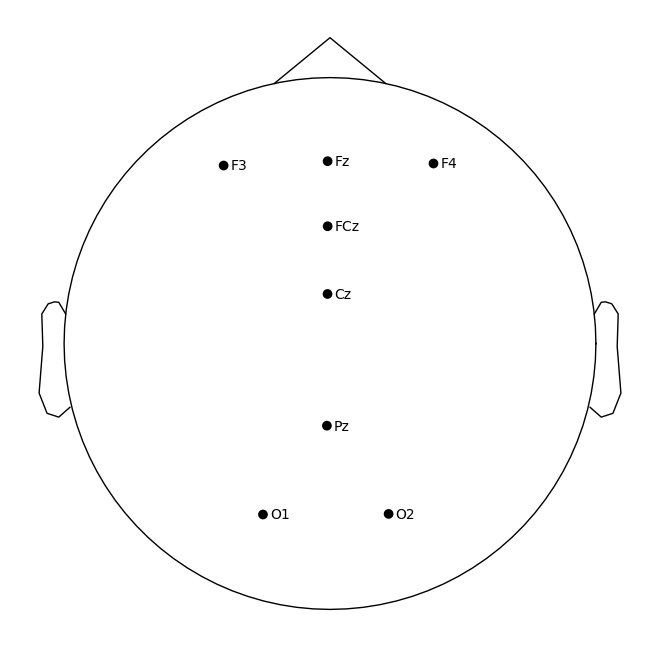

In [30]:
raw.set_montage('standard_1005')
raw.plot_sensors(show_names=True)
plt.show()

Effective window size : 8.192 (s)


/home/arjuna/miniconda3/lib/python3.10/site-packages/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


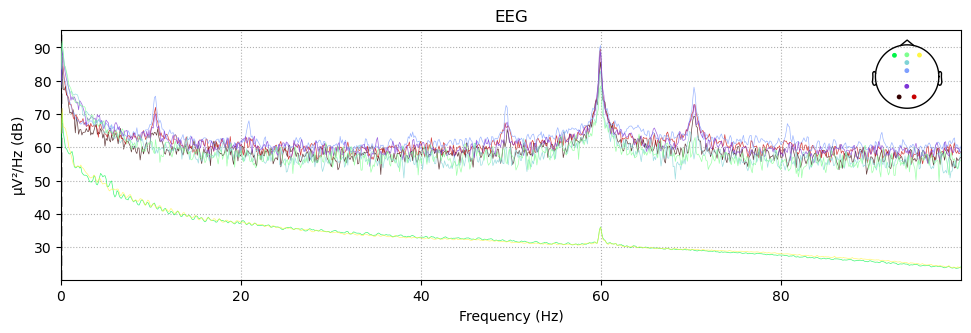

In [31]:
raw.compute_psd(fmax=100).plot(picks="data", exclude="bads")

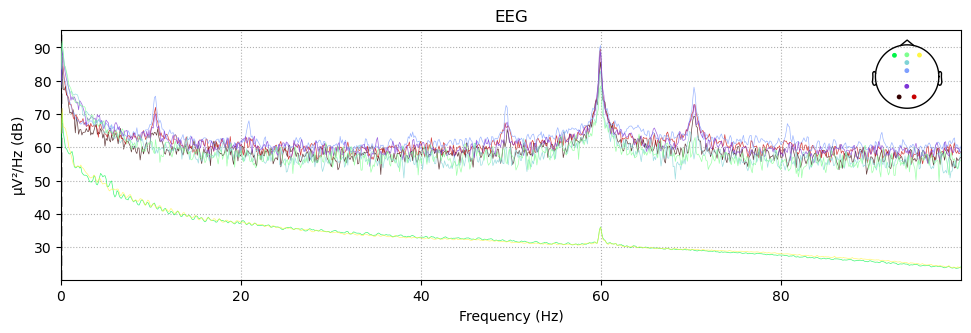

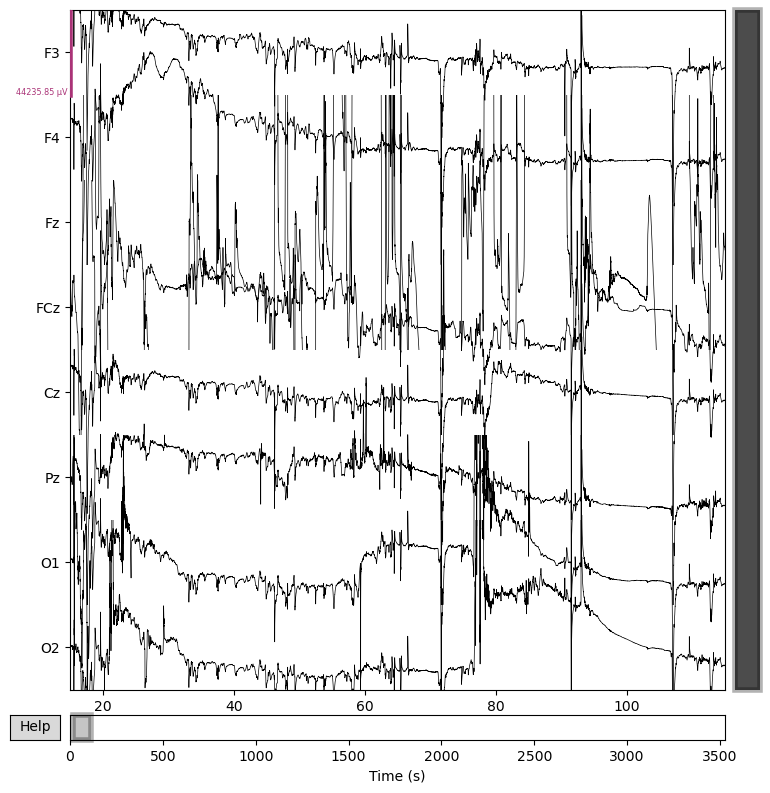

In [32]:
# be sure to include the semicolon at the end of the line. We'll learn why later.
raw.plot(start=15, duration=100, scalings="auto", remove_dc=True);  

In [33]:
# Filter settings
low_cut = 0.1
hi_cut  = 30

raw_filt = raw.copy().filter(low_cut, hi_cut)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 8251 samples (33.004 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.8s finished


In [34]:
raw_filt.info

<Info | 8 non-empty values
 bads: []
 ch_names: F3, F4, Fz, FCz, Cz, Pz, O1, O2
 chs: 8 EEG
 custom_ref_applied: False
 dig: 11 items (3 Cardinal, 8 EEG)
 highpass: 0.1 Hz
 lowpass: 30.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 250.0 Hz
>

Effective window size : 8.192 (s)


/home/arjuna/miniconda3/lib/python3.10/site-packages/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


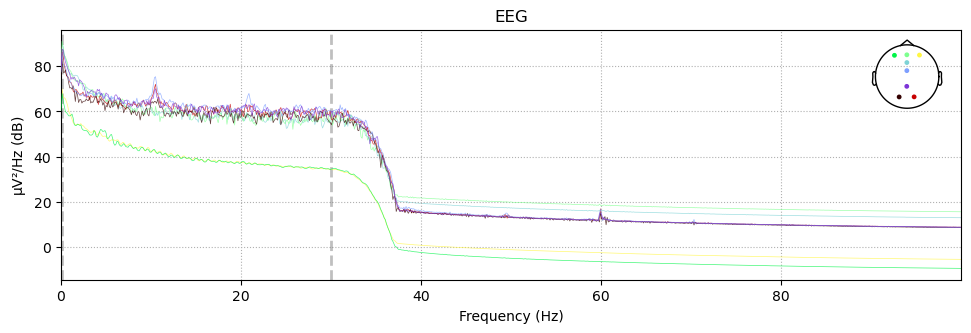

In [35]:
raw_filt.compute_psd(fmax=100).plot(picks="data", exclude="bads")

Effective window size : 8.192 (s)


/home/arjuna/miniconda3/lib/python3.10/site-packages/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


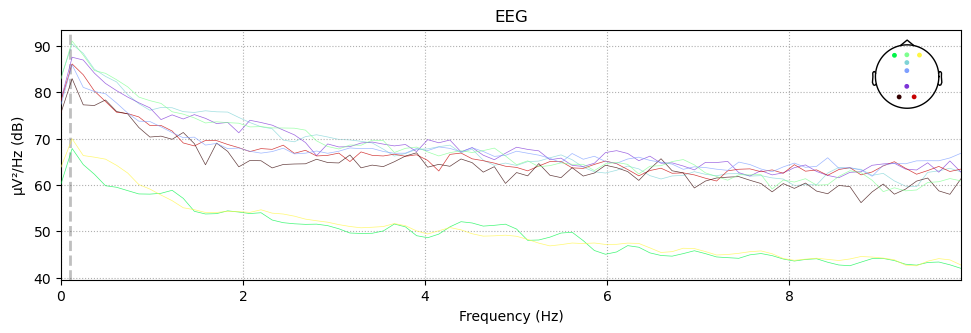

In [36]:
raw_filt.compute_psd(fmax=10).plot(picks="data", exclude="bads") # to see effects of the high pass filter

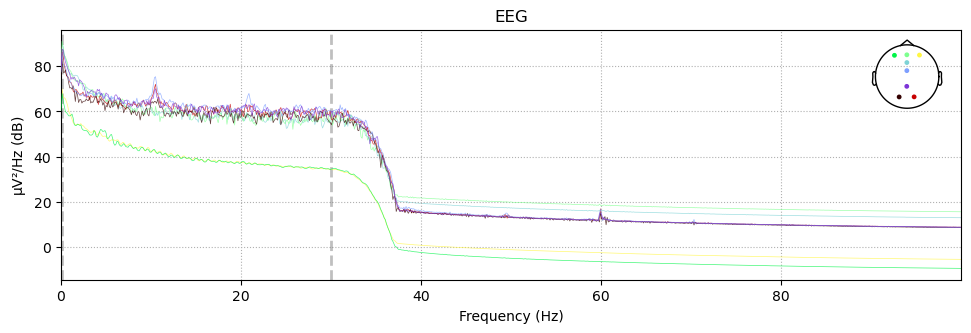

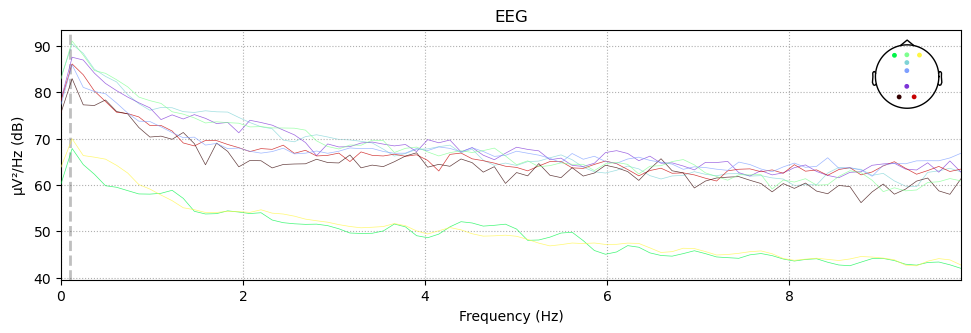

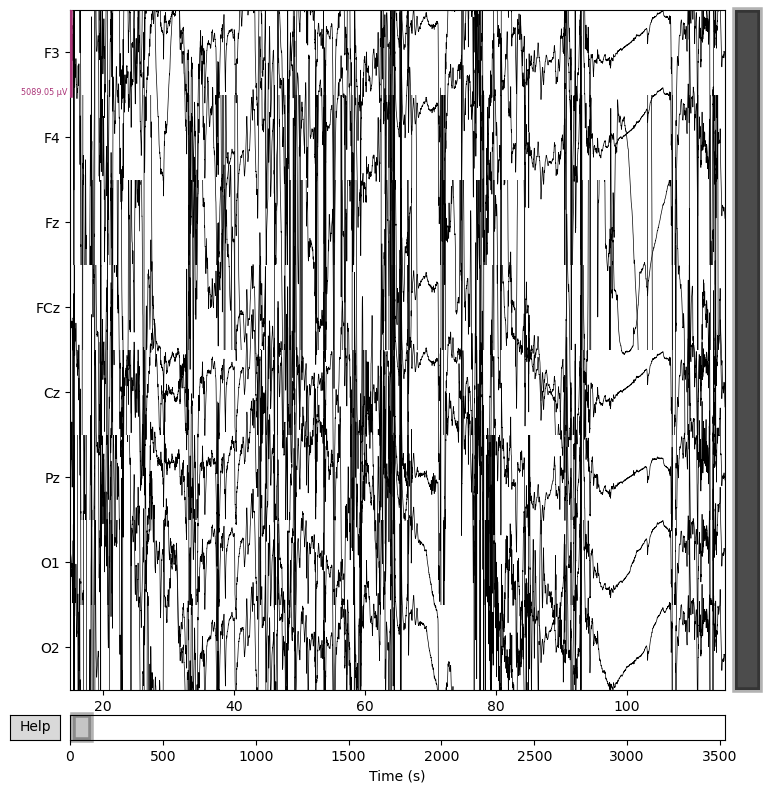

In [37]:
raw_filt.plot(start=15, duration=100, scalings="auto", remove_dc=True);

In [42]:
print(raw_filt.get_data().shape)

(8, 881709)


In [21]:
# raw_filt.save('../data/eeg/filt-raw.fif', overwrite=True)

Overwriting existing file.
Writing /mnt/d/Users/Arjuna/Desktop/Homework/Homework2/Dylan/NTNU/Neurolinguistics/Brainhack/EEG_Classify_Project/data/eeg/filt-raw.fif
Closing /mnt/d/Users/Arjuna/Desktop/Homework/Homework2/Dylan/NTNU/Neurolinguistics/Brainhack/EEG_Classify_Project/data/eeg/filt-raw.fif
[done]


In [38]:
# Extract the data and timestamps
eeg_data_filt = raw_filt.get_data()

# Reshape the data array to 2D (time x channels)
eeg_data_filt_2d = eeg_data_filt.transpose()

# Save the data as CSV
output_file = "../data/eeg/raw-filt.csv"
header = ",".join(raw.ch_names)
np.savetxt(output_file, eeg_data_filt_2d, delimiter=",", header=header, comments="")